In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('CNN_Articels_clean.csv')

In [9]:
df.sample(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
3827,4476,"Jack Bantock, CNN",2021-12-24 11:56:19,sport,sport,https://www.cnn.com/2021/12/24/sport/titans-49...,Thursday Night Football: 'We're not dead yet' ...,The Tennessee Titans needed a hero and A.J. Br...,"sport, Thursday Night Football: 'We're not dea...",Thursday Night Football: 'We're not dead yet' ...,(CNN)The Tennessee Titans needed a hero and A...
2658,3299,"Jill Martin, CNN",2021-08-17 03:18:42,sport,tennis,https://www.cnn.com/2021/08/16/tennis/naomi-os...,Naomi Osaka: Tennis player pauses press confer...,"Naomi Osaka, preparing to compete in her first...","tennis, Naomi Osaka: Tennis player pauses pres...",Naomi Osaka pauses press conference in tears a...,"(CNN)Naomi Osaka, preparing to compete in her..."
3286,3928,Analysis by Max Foster and Lauren Said-Moorhou...,2021-10-15 16:13:17,news,uk,https://www.cnn.com/2021/10/15/uk/royal-news-n...,Analysis: The Queen and senior royals get punc...,The monarch's remarks offered a rare glimpse i...,"uk, Analysis: The Queen and senior royals get ...",The Queen and senior royals get punchy on climate,A version of this story appeared in the Octobe...
3116,3758,"Ben Morse, CNN",2021-10-28 08:21:12,sport,golf,https://www.cnn.com/2021/10/28/golf/leona-magu...,Leona Maguire: the 26-year-old who shocked the...,Draped in an Ireland flag and dripping with ch...,"golf, Leona Maguire: the 26-year-old who shock...",Leona Maguire: the 26-year-old who shocked the...,(CNN)Draped in an Ireland flag and dripping w...
754,1363,"Blake Ellis and Melanie Hicken, CNN",2021-02-18 12:03:51,news,us,https://www.cnn.com/2021/02/18/us/nursing-home...,Government action took months as nursing home ...,"OSHA, the federal agency responsible for prote...","us, Government action took months as nursing h...",Government action took months as nursing home ...,(CNN)The federal agency responsible for prote...


# **Data Cleaning**
  * Removing unnecessary columns
  * dropping/imputing missing values
  * drop duplicates

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            4076 non-null   int64 
 1   Author           4076 non-null   object
 2   Date published   4076 non-null   object
 3   Category         4076 non-null   object
 4   Section          4076 non-null   object
 5   Url              4076 non-null   object
 6   Headline         4076 non-null   object
 7   Description      4076 non-null   object
 8   Keywords         4076 non-null   object
 9   Second headline  4076 non-null   object
 10  Article text     4076 non-null   object
dtypes: int64(1), object(10)
memory usage: 350.4+ KB


In [11]:
df = df[['Category','Description','Headline','Article text']]

In [12]:
df.sample(5)

,Category,Description,Headline,Article text
4044,sport,Human rights activist Peter Dahlin says the In...,Peng Shuai: Human rights activist Peter Dahlin...,(CNN)Human rights activist Peter Dahlin says ...
3653,news,When Australia's last two flamingos Greater an...,Australia's last two flamingos get new lease o...,(CNN)When Australia's last two flamingos Grea...
72,entertainment,The equivalent of missing what should be an ea...,'Winning Time: The Rise of the Lakers Dynasty'...,(CNN)The equivalent of missing what should be...
1762,news,A drug dealer whose fingerprints were analyzed...,Drug dealer jailed after sharing a photo of ch...,(CNN)A drug dealer whose fingerprints were an...
2697,sport,"""They always told me I could go back (to schoo...",JR Smith: Two-time NBA champion heads to colle...,"(CNN)""They always told me I could go back (to..."


In [13]:
df['Category'].value_counts()

Category
sport            2176
news             1611
business          104
politics           75
entertainment      58
health             52
Name: count, dtype: int64

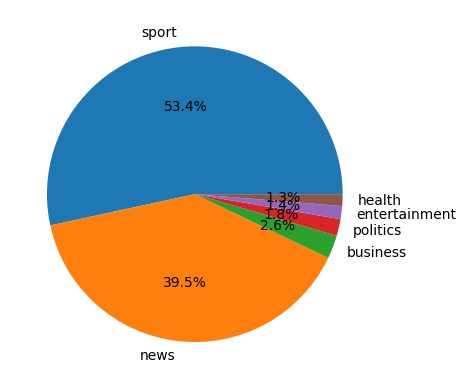

In [14]:
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

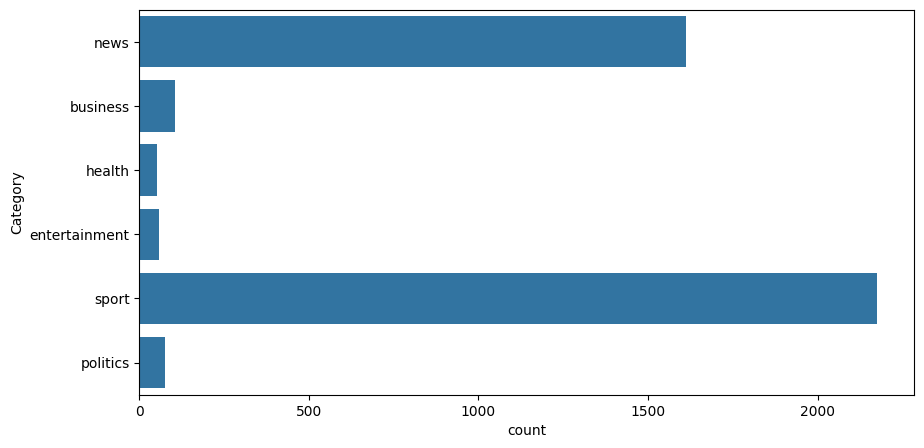

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(df['Category'])
plt.show()

**We can clearly see that there is huge data imbalance between the categories**

In [16]:
df.isnull().sum()

Category        0
Description     0
Headline        0
Article text    0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

**There are no missing values and duplicates in the dataset.**

In [18]:
df.shape

(4076, 4)

**The dataset consists of 4076 rows of information and 4 columns**


# **EDA**

In [19]:
df['Description'][0]

'The e-commerce boom has exacerbated a global truck driver shortage, but could autonomous trucks help fix the problem?'

In [20]:
df['Article text'][0]

' (CNN)Right now, there\'s a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world\'s largest truck manufacturers -- Navistar in the US and Traton, Volkswagen\'s trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world\'s first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see

In [21]:
df['Headline'][0]

"There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN"

In [22]:
import re
import nltk

In [23]:
df['num_of_char'] = df['Article text'].apply(len)

In [24]:
df

,Category,Description,Headline,Article text,num_of_char
0,news,The e-commerce boom has exacerbated a global t...,"There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...",12361
1,news,Working in a factory can mean doing the same t...,Bioservo's robotic 'Ironhand' could protect fa...,(CNN)Working in a factory or warehouse can me...,5815
2,news,"In a Hong Kong warehouse, a swarm of autonomou...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",3419
3,business,"For many years, the world's most popular emerg...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor...",3299
4,business,The European Union formally approved on Tuesda...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,3117
...,...,...,...,...,...
4071,sport,The Australian Open's Covid-19 vaccine mandate...,Australian Open: Australia's vaccine mandate i...,(Reuters)The Australian Open's Covid-19 vacci...,1519
4072,sport,Four golfers scheduled to play in the South Af...,Four golfers test positive ahead of South Afri...,(CNN)Four golfers scheduled to play in the So...,1116
4073,sport,Long-time International Olympic Committee (IOC...,Peng Shuai: 'Unanimous conclusion' that tennis...,(CNN)Long-time International Olympic Committe...,4335
4074,news,A Norwegian technology company has found a way...,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,3146


In [25]:
df['Category'].unique()

array(['news', 'business', 'health', 'entertainment', 'sport', 'politics'],
      dtype=object)

In [26]:
df[df['Category']=='sport'][['num_of_char']].describe()

,num_of_char
count,2176.000000
mean,4164.183824
std,4611.783392
min,441.000000
25%,2149.000000
50%,3111.000000
75%,4899.000000
max,89506.000000


In [27]:
nltk.download('punkt_tab')
df['num_of_words'] = df['Article text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [28]:
df['num_of_sents'] = df['Article text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df

,Category,Description,Headline,Article text,num_of_char,num_of_words,num_of_sents
0,news,The e-commerce boom has exacerbated a global t...,"There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...",12361,2353,78
1,news,Working in a factory can mean doing the same t...,Bioservo's robotic 'Ironhand' could protect fa...,(CNN)Working in a factory or warehouse can me...,5815,1076,37
2,news,"In a Hong Kong warehouse, a swarm of autonomou...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",3419,624,20
3,business,"For many years, the world's most popular emerg...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor...",3299,638,24
4,business,The European Union formally approved on Tuesda...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,3117,541,9
...,...,...,...,...,...,...,...
4071,sport,The Australian Open's Covid-19 vaccine mandate...,Australian Open: Australia's vaccine mandate i...,(Reuters)The Australian Open's Covid-19 vacci...,1519,284,7
4072,sport,Four golfers scheduled to play in the South Af...,Four golfers test positive ahead of South Afri...,(CNN)Four golfers scheduled to play in the So...,1116,195,5
4073,sport,Long-time International Olympic Committee (IOC...,Peng Shuai: 'Unanimous conclusion' that tennis...,(CNN)Long-time International Olympic Committe...,4335,802,15
4074,news,A Norwegian technology company has found a way...,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,3146,573,9


In [30]:
df[df['Category']=='sport'][['num_of_char','num_of_words','num_of_sents']].sort_values(by='num_of_char',ascending=True)

,num_of_char,num_of_words,num_of_sents
321,441,75,1
2694,443,81,2
3869,565,101,1
2728,599,109,2
2023,651,141,2
...,...,...,...
2646,43975,8065,183
2781,78167,14257,303
3352,84350,15471,327
2734,85460,15471,298


In [31]:
df[df['Category']=='sport'][['num_of_words','num_of_char','num_of_sents']].sort_values(by='num_of_words',ascending=True)

,num_of_words,num_of_char,num_of_sents
321,75,441,1
2694,81,443,2
3869,101,565,1
2728,109,599,2
2327,135,730,3
...,...,...,...
2646,8065,43975,183
2781,14257,78167,303
3352,15471,84350,327
2734,15471,85460,298


In [32]:
df[df['Category']=='sport'][['num_of_words','num_of_char','num_of_sents']].sort_values(by='num_of_sents',ascending=True)

,num_of_words,num_of_char,num_of_sents
3875,362,2071,1
2052,245,1407,1
2985,356,2040,1
3869,101,565,1
1826,158,963,1
...,...,...,...
337,4979,26379,185
2734,15471,85460,298
2781,14257,78167,303
3352,15471,84350,327


In [33]:
df['Article text'][1084]

' (CNN)Go Jessica!World No. 61 Jessica Pegula stunned No. 5 seed Elina Svitolina at the Australian Open to advance to the quarterfinals on Monday.The 26-year-old American, who is the daughter of the NFL team Buffalo Bills owners Kim and Terry Pegula, won 6-4, 3-6, 6-3 on Rod Laver Arena to reach the last eight of a grand slam for the first time.Pegula was the aggressor from the outset, with Svitolina unusually passive, allowing the American to dictate the early proceedings, clinching the first set.READ: Six years after his grandmother passed away, Nick Kyrgios grapples with demonsRead MorePegula celebrates after defeating  Svitolina.Ukrainian Svitolina rallied in the second set and helped by a patchy spell from Pegula leveled the match. But Pegula recovered her poise and ran away in the final set to reach the last eight of a grand slam for the first time in her career."I\'m hitting the ball really well, I thought I served really well, which is really important, especially against the t

In [34]:
df[df['Category']=='sport'][['num_of_char','num_of_words','num_of_sents']].describe()

,num_of_char,num_of_words,num_of_sents
count,2176.000000,2176.000000,2176.000000
mean,4164.183824,806.409007,23.852482
std,4611.783392,866.431570,23.706827
min,441.000000,75.000000,1.000000
25%,2149.000000,413.000000,11.000000
50%,3111.000000,597.000000,18.000000
75%,4899.000000,947.250000,29.000000
max,89506.000000,16373.000000,361.000000


**For sports category**
* Min char = 441 & Max char is = 4899
* Min words = 75 & Max words = 16373
* Min sentences = 1 & Max sentences = 361

* avg
  * char - 4164
  * words - 806
  * sentences - 23



In [35]:
df[df['Category']=='entertainment'][['num_of_char','num_of_words','num_of_sents']].describe()

,num_of_char,num_of_words,num_of_sents
count,58.000000,58.000000,58.000000
mean,3361.603448,666.448276,16.689655
std,2139.658629,437.464632,19.282941
min,712.000000,138.000000,4.000000
25%,2069.250000,433.750000,9.250000
50%,3199.500000,618.000000,12.000000
75%,4017.750000,766.750000,15.000000
max,14686.000000,2939.000000,142.000000


**For buisness category**
* Minimum
  * char - 712
  * words - 138
  * sentences - 4

* Maximun
  * char - 14686
  * words - 2939
  * sentences - 142

* Avg
  * char - 3361
  * words - 666
  * sentences - 16


In [36]:
df['Category'].value_counts()

Category
sport            2176
news             1611
business          104
politics           75
entertainment      58
health             52
Name: count, dtype: int64

In [37]:
df[df['Category']=='entertainment'][['num_of_char','num_of_words','num_of_sents']].describe()

,num_of_char,num_of_words,num_of_sents
count,58.000000,58.000000,58.000000
mean,3361.603448,666.448276,16.689655
std,2139.658629,437.464632,19.282941
min,712.000000,138.000000,4.000000
25%,2069.250000,433.750000,9.250000
50%,3199.500000,618.000000,12.000000
75%,4017.750000,766.750000,15.000000
max,14686.000000,2939.000000,142.000000


In [38]:
df[df['Category']=='news'][['num_of_char','num_of_words','num_of_sents']].describe()

,num_of_char,num_of_words,num_of_sents
count,1611.000000,1611.000000,1611.000000
mean,6407.202359,1205.589696,37.638734
std,5786.488992,1131.426489,48.210523
min,373.000000,71.000000,1.000000
25%,2668.000000,486.500000,11.000000
50%,4431.000000,828.000000,22.000000
75%,8310.000000,1553.500000,48.000000
max,51554.000000,11359.000000,618.000000


In [39]:
df[df['Category']=='politics'][['num_of_char','num_of_words','num_of_sents']].describe()

,num_of_char,num_of_words,num_of_sents
count,75.000000,75.000000,75.000000
mean,9506.040000,1769.226667,58.626667
std,8029.881823,1521.005673,61.748131
min,1200.000000,211.000000,5.000000
25%,3708.000000,658.000000,19.000000
50%,6456.000000,1163.000000,39.000000
75%,12461.500000,2280.500000,73.500000
max,39223.000000,7849.000000,378.000000


In [40]:
df[df['Category']=='health'][['num_of_char','num_of_words','num_of_sents']].describe()

,num_of_char,num_of_words,num_of_sents
count,52.000000,52.000000,52.000000
mean,16556.980769,3309.884615,145.557692
std,11576.598582,2351.973111,120.278992
min,1778.000000,334.000000,9.000000
25%,9112.500000,1708.500000,55.250000
50%,14808.500000,3010.500000,131.000000
75%,20031.750000,4019.000000,191.500000
max,69888.000000,14306.000000,720.000000


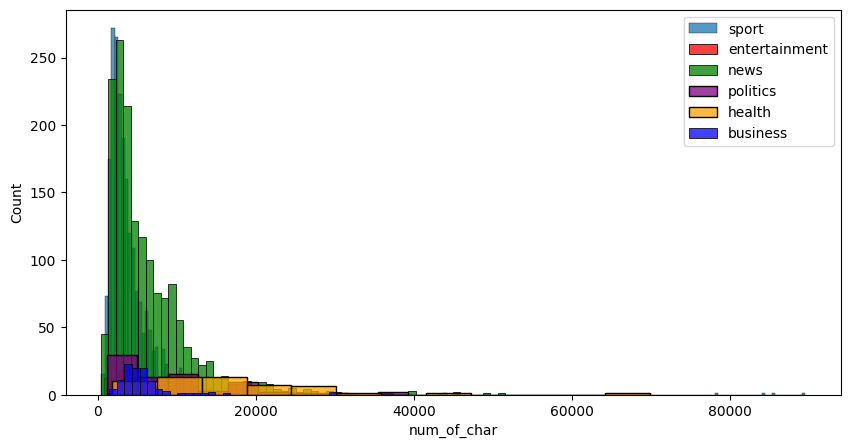

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Category']=='sport']['num_of_char'])
sns.histplot(df[df['Category']=='entertainment']['num_of_char'],color='red')
sns.histplot(df[df['Category']=='news']['num_of_char'],color='green')
sns.histplot(df[df['Category']=='politics']['num_of_char'],color='purple')
sns.histplot(df[df['Category']=='health']['num_of_char'],color='orange')
sns.histplot(df[df['Category']=='business']['num_of_char'],color='blue')
plt.legend(['sport','entertainment','news','politics','health','business'])
plt.show()

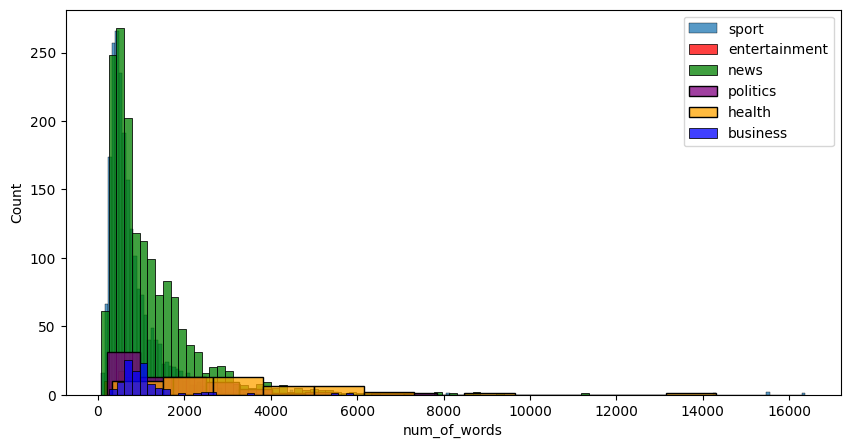

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Category']=='sport']['num_of_words'])
sns.histplot(df[df['Category']=='entertainment']['num_of_words'],color='red')
sns.histplot(df[df['Category']=='news']['num_of_words'],color='green')
sns.histplot(df[df['Category']=='politics']['num_of_words'],color='purple')
sns.histplot(df[df['Category']=='health']['num_of_words'],color='orange')
sns.histplot(df[df['Category']=='business']['num_of_words'],color='blue')
plt.legend(['sport','entertainment','news','politics','health','business'])
plt.show()

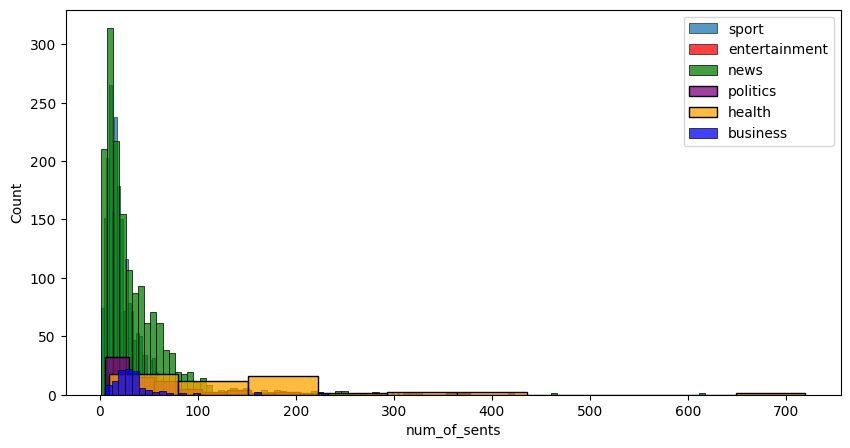

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Category']=='sport']['num_of_sents'])
sns.histplot(df[df['Category']=='entertainment']['num_of_sents'],color='red')
sns.histplot(df[df['Category']=='news']['num_of_sents'],color='green')
sns.histplot(df[df['Category']=='politics']['num_of_sents'],color='purple')
sns.histplot(df[df['Category']=='health']['num_of_sents'],color='orange')
sns.histplot(df[df['Category']=='business']['num_of_sents'],color='blue')
plt.legend(['sport','entertainment','news','politics','health','business'])
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
num_df = df[['num_of_char','num_of_words','num_of_sents','Category']]
num_df['Category'] = le.fit_transform(num_df['Category'])

C:\Users\HP\AppData\Local\Temp\ipykernel_8604\1187032244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Category'] = le.fit_transform(num_df['Category'])


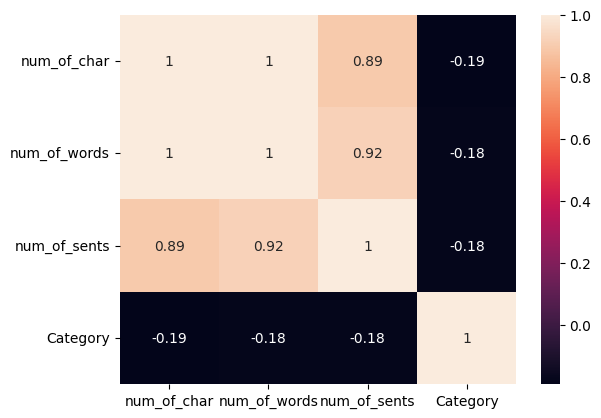

In [45]:
sns.heatmap(num_df.corr(),annot=True)
plt.show()

In [47]:
import wordcloud
from wordcloud import WordCloud

# **Text Preprocessing**

   * Lower case
   * Tokenize
   * Remove stopwords
   * Remove special char and punctuation
   * Stemming / Lemmitization


In [48]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [51]:
words = ['said','say','like','cnn','us','also']

In [52]:
def txt_process(text):
  text = text.lower() # convert to lower
  token = nltk.word_tokenize(text) # tokenize words

  # remove stopwords
  y = []
  for i in token:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  # remove special char
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  # Stemming
  for i in text:
    y.append(ps.stem(i))

  text = y[:]
  y.clear()
  text_str = " ".join(text)

  for i in text_str.split():
    if i not in words:
      y.append(i)

  return " ".join(y)

In [ ]:
import tqdm
df['Processed_text'] = df['Article text'].apply(txt_process)

In [ ]:
df['Category'].value_counts()

In [ ]:
df

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
news_text = df[df['Category']=='news']['Processed_text'].str.cat(sep=" ")
news_wc = wc.generate(news_text)

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.imshow(news_wc)

In [ ]:
sport_text = (df[df['Category']=='sport']['Processed_text']).str.cat(sep=" ")
sport_wc = wc.generate(sport_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(sport_wc)

In [ ]:
buisness_text = (df[df['Category']=='business']['Processed_text']).str.cat(sep=" ")
buisness_wc = wc.generate(buisness_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(buisness_wc)

In [ ]:
health_text = (df[df['Category']=='health']['Processed_text']).str.cat(sep=" ")
health_wc = wc.generate(health_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(health_wc)

In [ ]:
entertain_text = (df[df['Category']=='entertainment']['Processed_text']).str.cat(sep=" ")
entertain_wc = wc.generate(entertain_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(entertain_wc)

In [ ]:
politics_text = (df[df['Category']=='politics']['Processed_text']).str.cat(sep=" ")
politics_wc = wc.generate(politics_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(politics_wc)

# **Counting most common or Frequent words in each category**

In [ ]:
from collections import Counter

In [ ]:
news_corpus = []

# seperating the sentences in news category and appending every single word into the list
for msg in df[df['Category']=='news']['Processed_text'].tolist():
  for word in msg.split():
    news_corpus.append(word)

# filtering out the most common 30 words that occur frequently in news category
Counter(news_corpus).most_common(10)

# plotting the word vs count plot
news_corpus_df =  pd.DataFrame(Counter(news_corpus).most_common(30),columns=['word','count'])
fig = plt.figure(figsize=(15,6))
sns.barplot(data=news_corpus_df,x='word',y='count',orient = 'vertical')
plt.show()

In [ ]:
sport_corpus = []

for msg in df[df['Category']=='sport']['Processed_text'].tolist():
  for word in msg.split():
    sport_corpus.append(word)

Counter(sport_corpus).most_common(30)

sport_corpus_df = pd.DataFrame(Counter(sport_corpus).most_common(30),columns=['word','count'])
fig = plt.figure(figsize=(15,6))
sns.barplot(data=sport_corpus_df,x='word',y='count')
plt.show()

In [ ]:
buisness_corpus = []

for msg in df[df['Category']=='business']['Processed_text'].tolist():
  for word in msg.split():
    buisness_corpus.append(word)

Counter(buisness_corpus).most_common(30)

buisness_corpus_df = pd.DataFrame(Counter(buisness_corpus).most_common(30),columns=['word','count'])
fig = plt.figure(figsize=(15,6))
sns.barplot(data=buisness_corpus_df,x='word',y='count')
plt.show()

In [ ]:
entertain_corpus = []

for msg in df[df['Category']=='entertainment']['Processed_text'].tolist():
  for word in msg.split():
    entertain_corpus.append(word)

Counter(entertain_corpus).most_common(30)

entertain_corpus_df = pd.DataFrame(Counter(entertain_corpus).most_common(30),columns=['word','count'])
fig = plt.figure(figsize=(15,6))
sns.barplot(data=entertain_corpus_df,x='word',y='count')
plt.show()

In [ ]:
politics_corpus = []

for msg in df[df['Category']=='politics']['Processed_text'].tolist():
  for word in msg.split():
    politics_corpus.append(word)

Counter(politics_corpus).most_common(30)

politics_corpus_df  = pd.DataFrame(Counter(politics_corpus).most_common(30),columns=['word','count'])
fig = plt.figure(figsize=(15,6))
sns.barplot(data=politics_corpus_df,x='word',y='count')
plt.show()

In [ ]:
health_corpus = []

for msg in df[df['Category']=='health']['Processed_text'].tolist():
  for word in msg.split():
    health_corpus.append(word)

Counter(health_corpus).most_common(30)

health_corpus_df = pd.DataFrame(Counter(health_corpus).most_common(30),columns=['word','count'])
fig = plt.figure(figsize=(15,6))
sns.barplot(data=health_corpus_df,x='word',y='count')
plt.show()

* We have realized that words like say, said, cnn, like, us, also, etc. have occured which doesn't makes sense into classifying these into the respecive Categories

* We have to try removing these words and again analyze the text.

In [ ]:
# words = ['said','say','like','cnn','us','also']
# z = []
# def process(text):
#   for i in text.split():
#     if i not in words:
#       z.append(i)

#   return " ".join(z)

In [ ]:
# df['Processed_text'] = df['Processed_text'].apply(process)

In [ ]:
df

In [ ]:
news_text = df[df['Category']=='news']['Processed_text'].str.cat(sep=" ")
news_wc = wc.generate(news_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(news_wc)

In [ ]:
sport_text = (df[df['Category']=='sport']['Processed_text']).str.cat(sep=" ")
sport_wc = wc.generate(sport_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(sport_wc)

In [ ]:
entertain_text = (df[df['Category']=='entertainment']['Processed_text']).str.cat(sep=" ")
entertain_wc = wc.generate(entertain_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(entertain_wc)

In [ ]:
buisness_text = (df[df['Category']=='business']['Processed_text']).str.cat(sep=" ")
buisness_wc = wc.generate(buisness_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(buisness_wc)

In [ ]:
health_text = (df[df['Category']=='health']['Processed_text']).str.cat(sep=" ")
health_wc = wc.generate(health_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(health_wc)

In [ ]:
politics_text = (df[df['Category']=='politics']['Processed_text']).str.cat(sep=" ")
politics_wc = wc.generate(politics_text)
fig = plt.figure(figsize=(15,6))
plt.imshow(politics_wc)

# **Model Building**

In [ ]:
df['Category'].value_counts()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cv = CountVectorizer(max_features = 3000)
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = cv.fit_transform(df['Processed_text']).toarray()

In [ ]:
feature_names = cv.get_feature_names_out()
total_words = len(feature_names)
print(f"Total number of words in vocabulary: {total_words}")

In [ ]:
X.shape

In [ ]:
pd.Series(le.fit_transform(df['Category'])).value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y = df['Category'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
y_train

In [ ]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'GNB': gnb,
    'BNB' : bnb,
    'MNB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gdbt,
    'xgb': xgb
}

In [ ]:
def train(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred,average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')

  return accuracy, precision, f1

In [ ]:
accuracy_scores = []
precision_scores = []
f1_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision, current_f1 = train(clf, X_train, y_train, X_test, y_test)

  print("For ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)
  print("F1_Score - ", current_f1)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  f1_scores.append(current_f1)

In [ ]:
result = pd.DataFrame({'Algorithm':clfs.keys(),
                       'Accuracy':accuracy_scores,
                       'Precision':precision_scores,
                       'F1_Score':f1_scores}).sort_values('Precision',ascending=False)

In [ ]:
result

In [ ]:
result2 = pd.DataFrame({'Algorithm':clfs.keys(),
                       'Accuracy':accuracy_scores,
                       'Precision':precision_scores,
                       'F1_Score':f1_scores}).sort_values('F1_Score',ascending=False)

In [ ]:
result2

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.show()

In [ ]:
y_pred_mnb = mnb.predict(X_test)

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_mnb)

In [ ]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=le.classes_)
disp1.plot()
plt.show()

In [ ]:
y_pred_lr = lrc.predict(X_test)

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [ ]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)
disp2.plot()
plt.show()

In [ ]:
import pickle
pickle.dump(cv,open('vectorizer3k.pkl','wb'))
pickle.dump(xgb,open('xgb3k.pkl','wb'))

In [ ]:
pickle.dump(lrc,open('lrc20test.pkl','wb'))
pickle.dump(mnb,open('mnb20test.pkl','wb'))